# Assignment 2 CDS-SEM1: 

### Part 1: divorce and margarine correlation

In [1]:
# Installing packages for processing data
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')
install.packages('gridExtra')
# install.packages('')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [3]:
# Loading packages
library(dplyr)
library(ggplot2)
library(dslabs)
library(gridExtra)

In [11]:
# Loading data on divorce rates
data(divorce_margarine)
str(divorce_margarine)

'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


In [18]:
# Making two objects, these being the plots 
# Margarine consumption over the year, with x being year and y being margarine consumption
mar_cons_year <- ggplot(divorce_margarine,
       aes(x = year,
           y = margarine_consumption_per_capita)) +
    geom_point()
# Divorce rates in Maine over the years, with x being the year and y being the divorce rate
divorce_year <- ggplot(divorce_margarine,
       aes(x = year,
           y = divorce_rate_maine)) +
    geom_point()

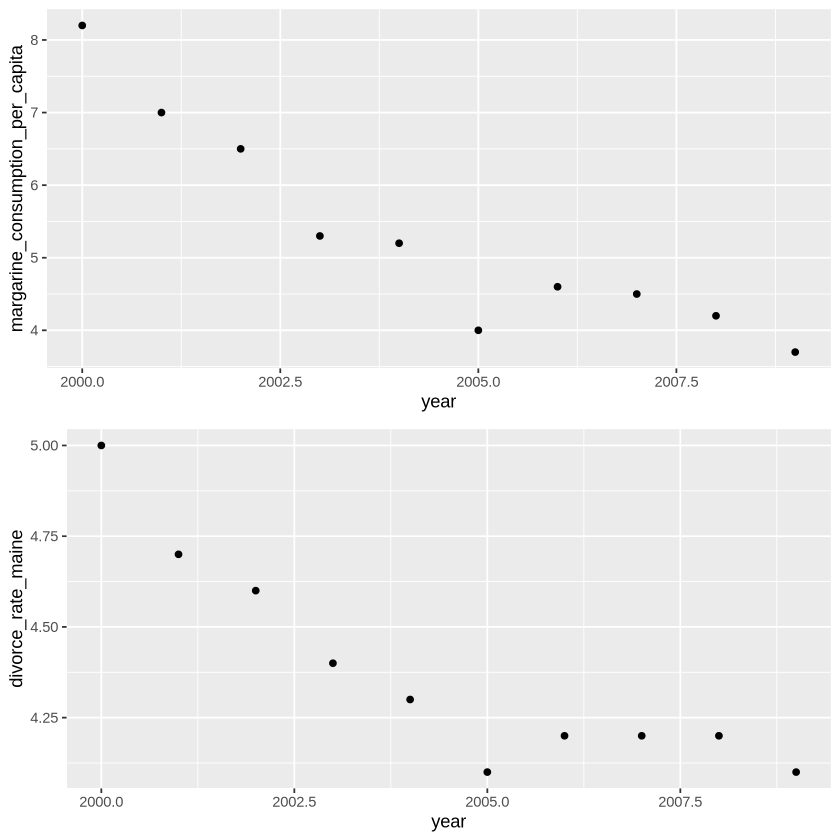

In [16]:
# Plotting them side by side to visualize correlation
grid.arrange(mar_cons_year, divorce_year)

In [19]:
# Doing a cor test to figure the confidence interval, i.e. p-value
cor.test(divorce_margarine$divorce_rate_maine, divorce_margarine$margarine_consumption_per_capita)


	Pearson's product-moment correlation

data:  divorce_margarine$divorce_rate_maine and divorce_margarine$margarine_consumption_per_capita
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


Granted that there are no external factors affecting the consumption of margarine to divorce rate in Maine, 
it can be concluded that there is a correlation between these two variables.

### Part 2: Vocabulary

In [4]:
install.packages('car') # working dataset

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modelr’, ‘broom’, ‘doBy’, ‘survival’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [5]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [6]:
data(GSSvocab)

In [20]:
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [8]:
# Filtering data to only including the year 1978
vocab1978 = GSSvocab %>%
    filter(year == "1978")
str(vocab1978)

'data.frame':	1532 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [9]:
# Removing N/A values from the dataset
vocab78_no_na = vocab1978 %>%
    na.exclude(vocab1978)
str(vocab78_no_na)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


In [17]:
# Creating plot objects again for comparison's sake

nojitter_vocab78 <- ggplot(vocab78_no_na,
      aes(x = educ,
         y = vocab)) +
    geom_point()

jitter_vocab78 <- ggplot(vocab78_no_na,
      aes(x = educ,
         y = vocab)) +
    geom_point(position = 'jitter')

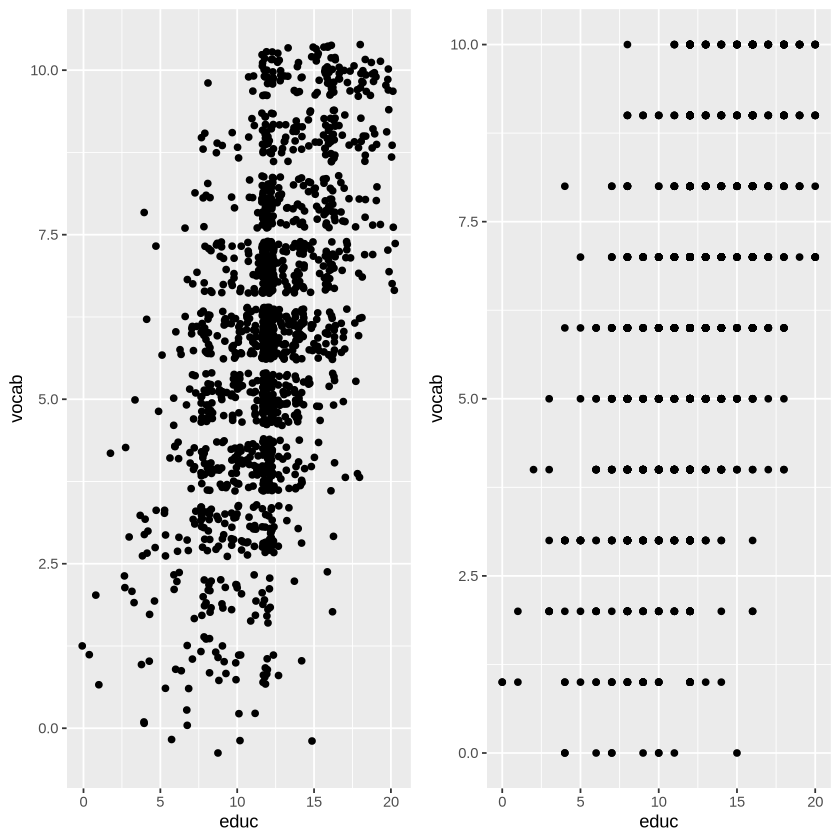

In [19]:
# Visualizing same graph with and without jitter
grid.arrange(jitter_vocab78, nojitter_vocab78, ncol = 2)

In [21]:
# Modelling the relationship between education and vocabulary
vocab_model <- lm(vocab ~ educ, vocab78_no_na)
summary(vocab_model)


Call:
lm(formula = vocab ~ educ, data = vocab78_no_na)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


There seems to be a pretty strong correlation between vocabulary and level of education

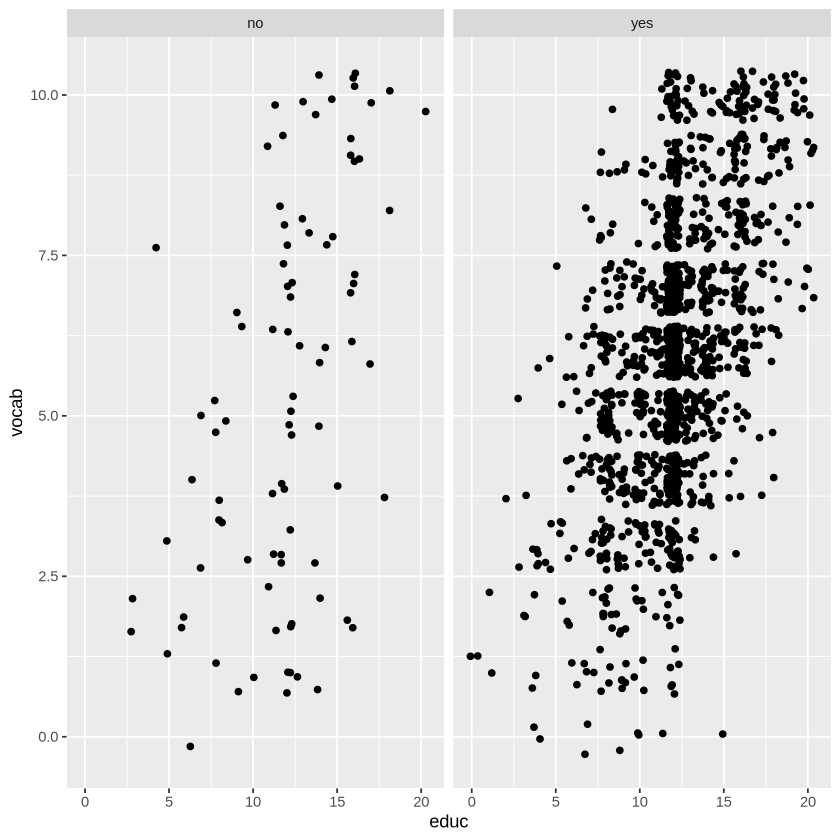

In [22]:
# Visualizing the difference between the vocabulary of native-born people vs non-native-born people
ggplot(vocab78_no_na,
      aes(x = educ,
         y = vocab)) +
    geom_point(position = 'jitter') +
    facet_wrap( ~nativeBorn)

In [23]:
# Modelling now to see whether it is worth considering nativity
summary(lm(vocab ~ educ * nativeBorn, vocab78_no_na))


Call:
lm(formula = vocab ~ educ * nativeBorn, data = vocab78_no_na)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ:nativeBornyes -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


Splitting natives from non_natives does not give a significantly different correlation, compared to the whole dataset. It doesn't really make sense to split them apart.

Both models perform well, and both pass the alternative hypothesis. There is no significant difference between either.